<h1 align="center">
    <span style="color:#381a23; background-color:#f1cfd3; padding:8px; border-radius:10px">Dengue Dataset Analysis</span>
</h1>

<div align="center"> 
    <img src='https://saludnews.net/wp-content/uploads/2023/08/Picadura-del-Dengue.jpg' width=500px>
</div>

<h4>Importing necessary files</h4>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#making a datframe out of the datset and calling it to check if it works
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h4>Checking if there are null values</h4>

In [2]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h4>Changing the data types</h4>

In [3]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h4>Making a new column (island)</h4>

In [4]:
for region in dengue['Region'].unique():
    print(region)

Region I
Region II
Region III
Region IV-A
Region IV-B
Region V
Region VI
Region VII
Region VIII
Region IX
Region X
Region XI
Region XII
Region XIII
NCR
CAR
BARMM


In [5]:
island = {
    "Region I": "Luzon",
    "Region II": "Luzon",
    "Region III": "Luzon",
    "Region IV-A": "Luzon",
    "Region IV-B": "Luzon",
    "Region V": "Luzon",
    "NCR": "Luzon",
    "CAR": "Luzon",
    "Region VI": "Visayas",
    "Region VII": "Visayas",
    "Region VIII": "Visayas",
    "Region IX": "Mindanao",
    "Region X": "Mindanao",
    "Region XI": "Mindanao",
    "Region XII": "Mindanao",
    "Region XIII": "Mindanao",
    "BARMM": "Mindanao"
}

dengue["Island"] = dengue["Region"].map(island)
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island
0,January,2016,Region I,705,1,Luzon
1,February,2016,Region I,374,0,Luzon
2,March,2016,Region I,276,0,Luzon
3,April,2016,Region I,240,2,Luzon
4,May,2016,Region I,243,1,Luzon
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,Mindanao
1016,September,2020,BARMM,16,8,Mindanao
1017,October,2020,BARMM,13,9,Mindanao
1018,November,2020,BARMM,15,1,Mindanao


<h1 align='center'; style='color:purple'>10 Insights</h1>

<h1>What are the regions that has the highest cases of dengue deaths?</h1>

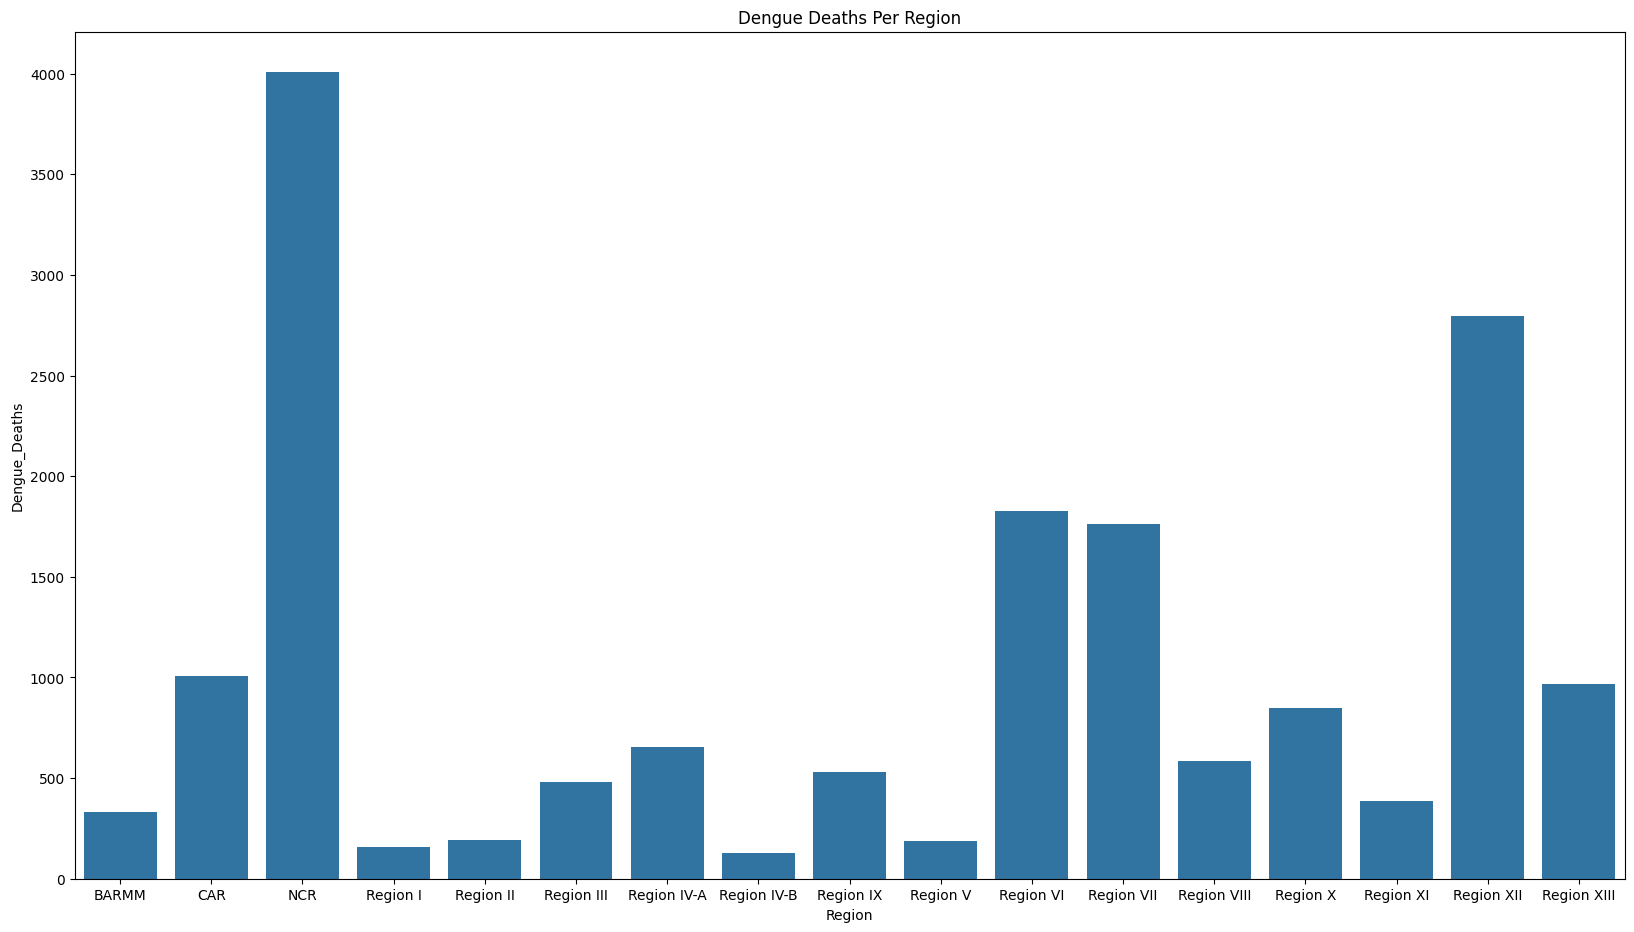

In [6]:
# barplot for the dengue deaths per region
sum_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()
plot = sns.barplot(data=sum_deaths, x="Region",y="Dengue_Deaths")
plt.gcf().set_size_inches(20,11)
plt.title("Dengue Deaths Per Region")
plt.show()

<h2> <strong><i>Insight 1: </i></strong>According to the chart, NCR accummulated the highest cases of dengue deaths. According to PTV news, From Jan. 1 to Oct. 26 2024, the NCR recorded 2,734 cases with <strong>216 deaths</strong>. The figure was 90.92 percent higher compared to the same period last year. </h2>

<h2> <strong><i>Insight 2: </i></strong>The second-most highest is the Region XII. According to MindaNews, dengue-related deaths in Region 12 have reached 79 as of the end of October 2024, as the surging cases are feared to breach epidemic records by the end of the year.</h2>

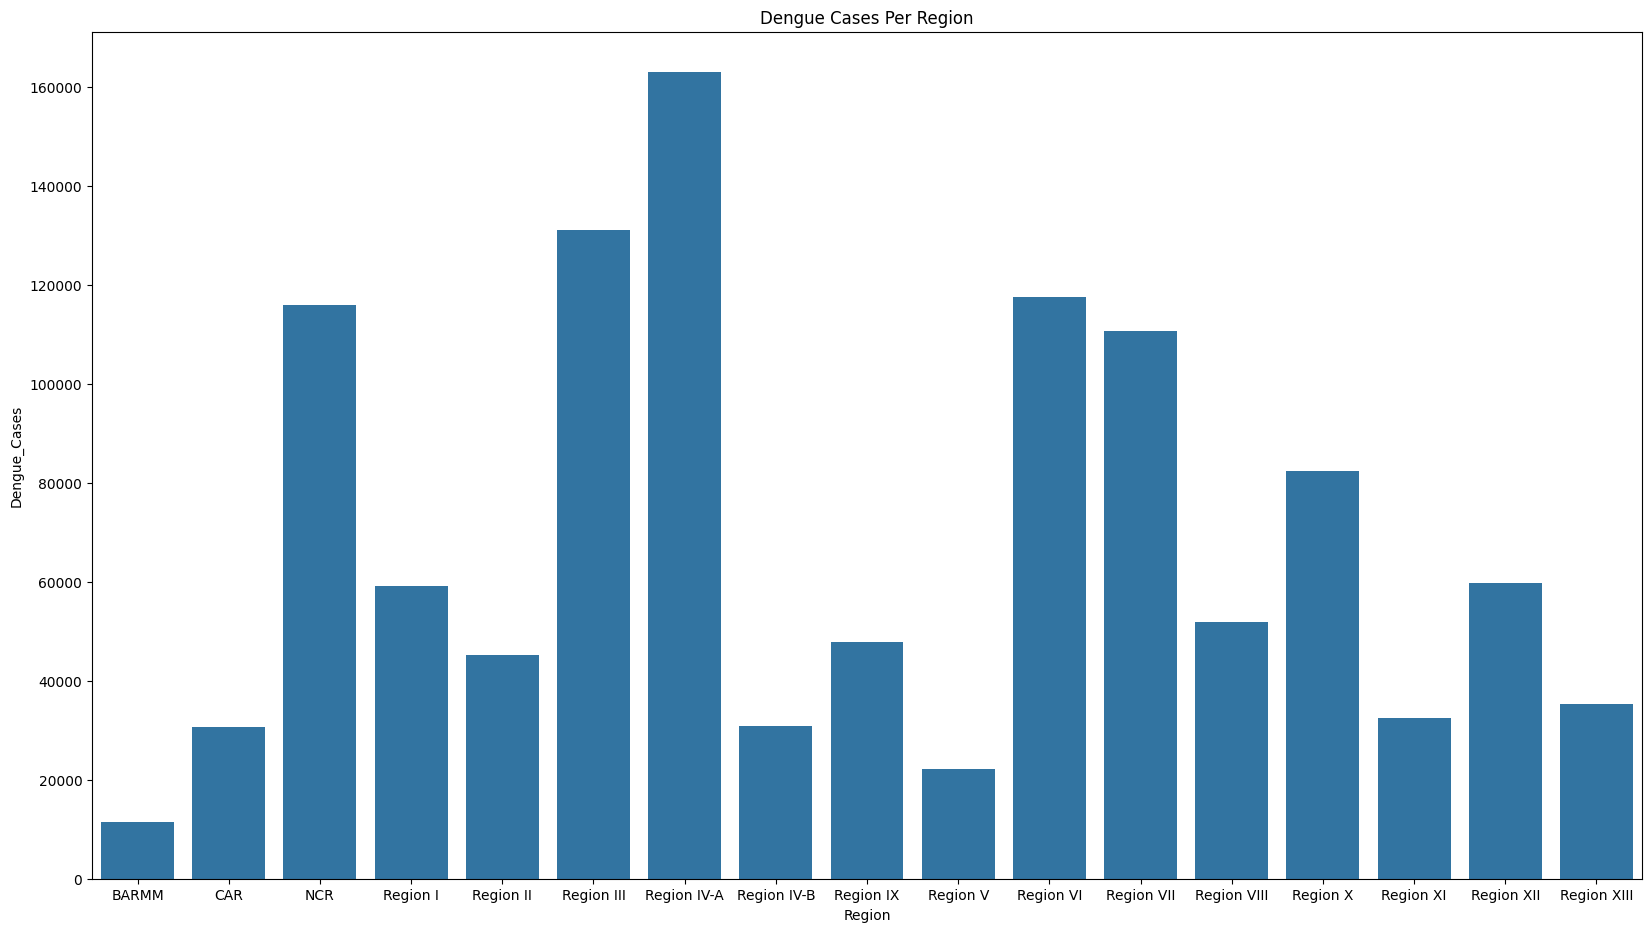

In [7]:
# bar plot for the dengue cases per region
sum_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()
plot = sns.barplot(data=sum_cases, x="Region",y="Dengue_Cases")
plt.gcf().set_size_inches(20,11)
plt.title("Dengue Cases Per Region")
plt.show()

<h3> <strong><i>Insight 3: </i></strong>In terms of dengue cases, Region IV-A had the highest records. Dengue cases in CALABARZON have reached 14,003 as of August 17, 2024, from the start of the year, marking a 15.02 percent increase from the same period in 2023 (GMA Regional TV). It was followed by Region III, then NCR. It was confirmed by the statement of DOH on Monday, Feb. 17, 2025, <strong>"Eight more areas are expected to declare a dengue outbreak as cases continue to surge in Region IV-A, Region III, and Metro Manila (NCR)"</strong>.</h3>

<h2>What is the correlation between Dengue cases and Dengue deaths?</h2>

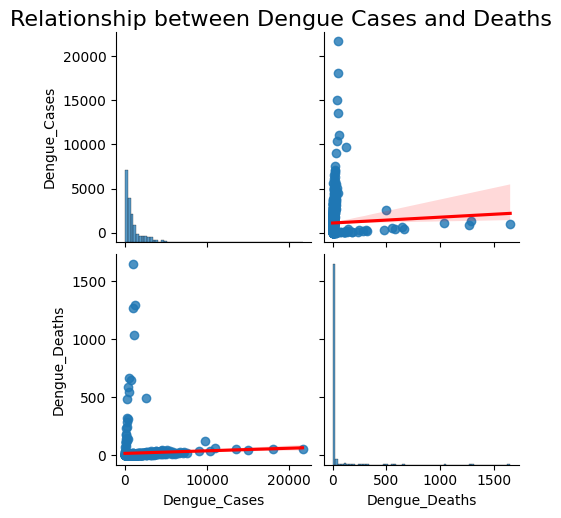

In [8]:
sns.pairplot(
    dengue[['Dengue_Cases', 'Dengue_Deaths']],
    kind='reg',  
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.suptitle('Relationship between Dengue Cases and Deaths', y=1.02, fontsize=16)
plt.show()

<p>One look on the bar chart, my first thought was "Hindi pala sa pagtaas ng cases, sa pagtaas rin ng deaths?" which was so silly of me when i think about it now, and so I used pairplot to know what really is.</p>

<h3> <strong><i>Insight 4: </i></strong>Lets focus first on the histograms. Most of the regions have low cases but there few regions with very high cases, meaning the <strong>dengue outbreaks are unequally distributed</strong>. For the scatterplot, the red line indicates a trend (like a line plot) and we can see that is slightly slanted upward but most of the time it is flat. It means that there is a <strong>weak positive correlation</strong> between them, meaning when cases go up, the deaths also rises, but not strongly. As for the dots, it is showing that most regions have low deaths and cases while few have outbreaks.</h3>

<h2>What is the dengue cases trend from 2016-2020?</h2>

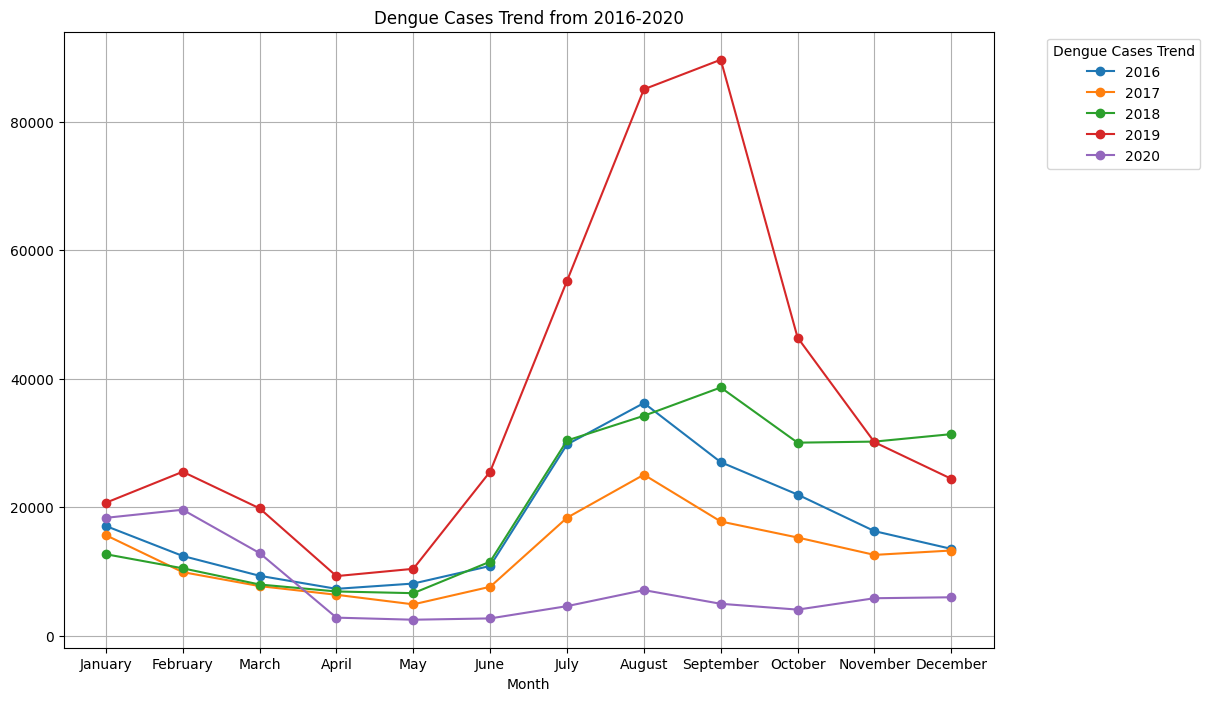

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line', marker='o', title="Dengue Cases Trend from 2016-2020")
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.legend(title='Dengue Cases Trend', bbox_to_anchor = (1.05,1), loc='upper left')
plt.xticks(range(0,12), month_order)
plt.show()

<h3><strong><i>Insight 5: </i></strong>The dengue cases trend had spikes on August and September 2019 and drops on October 2019. As we can see, the cases of dengue started increasing from June to September. The Department of Health (DOH) on Tuesday, 6 August  2019, declared a national dengue epidemic as cases of the <strong>mosquito-borne disease</strong> continued to rise in the country. The Department of Health reports a total of 146,062 dengue cases from January to July 2019. <strong>271,480 dengue cases</strong>, including 1,107 deaths, reported from 1 January to 31 August 2019: <strong>113% higher than in 2018</strong>.</h3>

<h3><strong><i>Insight 6: </i></strong>I noticed that the dengue cases are low during April and May which are both the vacation month of students. The cases started rising on June which is back to school until February, it started decreasing at March which is the last month of school year. So, therefore we can conclude that school might be one of the hotspots areas for habitats of mosquito(dengue). However, i cannot find a basis for this.</h3>

<h2>What is the dengue deaths trend from 2016-2020?</h2>

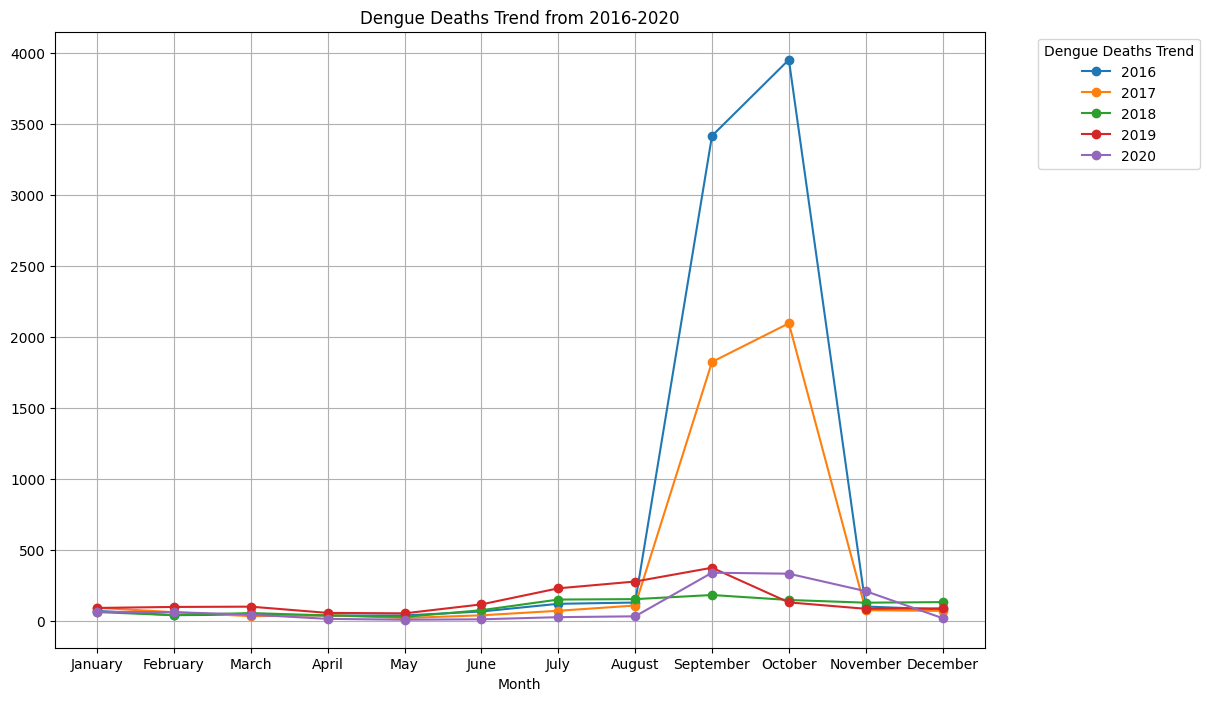

In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Deaths"].sum()

monthly_cases.unstack().plot(kind='line', marker='o', title="Dengue Deaths Trend from 2016-2020")
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.legend(title='Dengue Deaths Trend', bbox_to_anchor = (1.05,1), loc='upper left')
plt.xticks(range(0,12), month_order)
plt.show()

<h3><strong><i>Insight 7: </i></strong>Based on the chart, from January to August the records of death due to dengue are <strong>significantly low</strong>. It only spikes on September and October 2016 and slightly on the same months on 2017 and drops on November and December. As of 20 August 2016, there were 101,401 suspected cases of dengue reported in 2016, including 422 deaths. This is 16% higher than that reported during the same period in 2015. Overall, most of the dengue deaths have low cases and few have spikes.</h3>

<h2>Which island has the highest dengue cases?</h2>

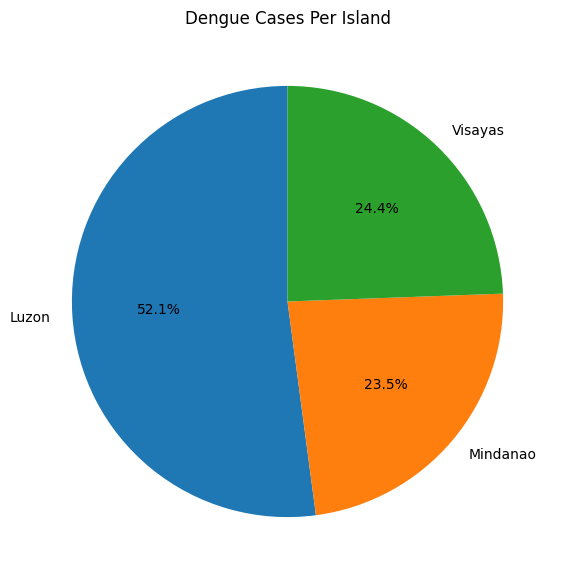

In [19]:
island_dengue = dengue.groupby('Island')['Dengue_Cases'].sum()

plt.pie(island_dengue,
        labels = island_dengue.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Dengue Cases Per Island')
plt.show()

<h2><strong><i>Insight 8: </i></strong>Luzon accumulated the highest percentage of dengue cases with 52.1%. It was followed by Visayas at 24.4% which is just slightly higher from Mindanao with 23.5%.</h2>

<h2>Which island has the highest dengue deaths?</h2>

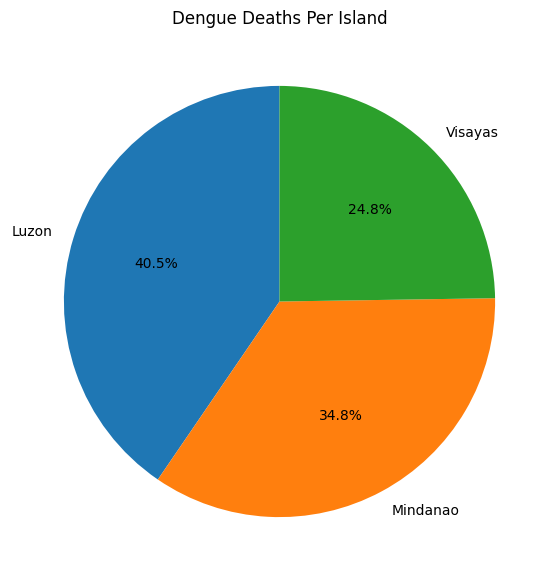

In [21]:
island_dengue = dengue.groupby('Island')['Dengue_Deaths'].sum()

plt.pie(island_dengue,
        labels = island_dengue.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Dengue Deaths Per Island')
plt.show()

<h2><strong><i>Insight 9: </i></strong>In terms of dengue deaths, Luzon is still #1 with 40.5%., followed by Mindanao at 34.8%, then Visayas with 24.8%.</h2>

<h2>In general, what specific month does the highest dengue cases occur?</h2>

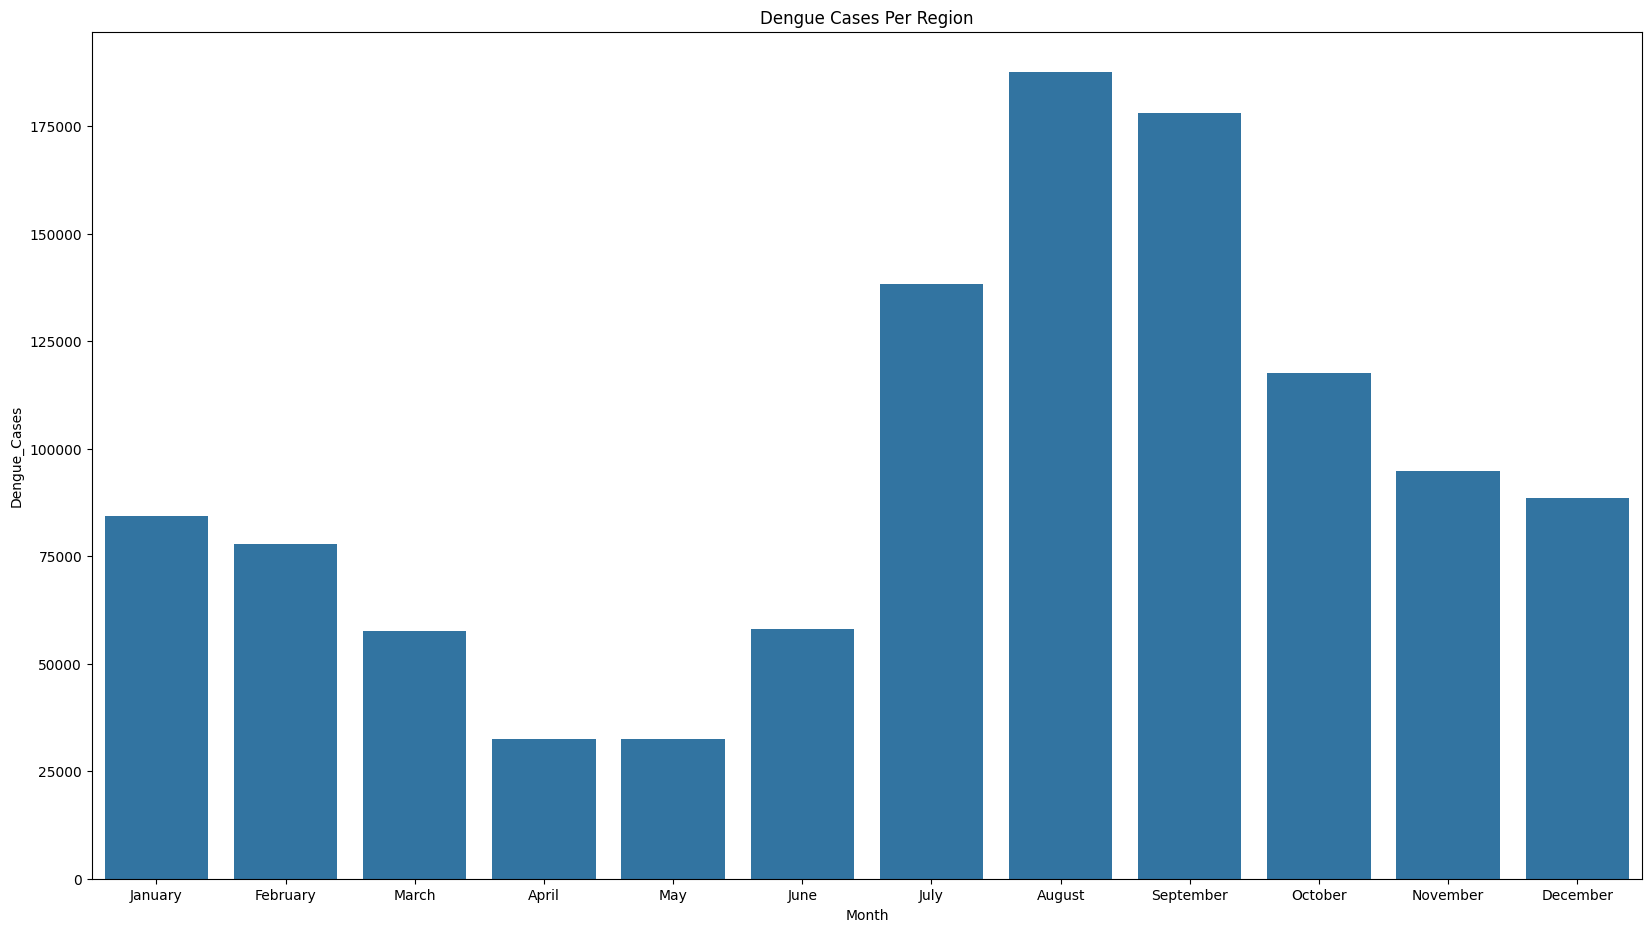

In [28]:
sum_cases = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()
plot = sns.barplot(data=sum_cases, x="Month",y="Dengue_Cases")
plt.gcf().set_size_inches(20,11)
plt.title("Dengue Cases Per Region")
plt.show()

<h2><strong><i>Insight 10: </i></strong>In general, <strong>August</strong> is the month with the highest peak of dengue cases which followed by September which is just slight lower.</h2>

<h2>In terms of each island, what is their peak month?</h2>

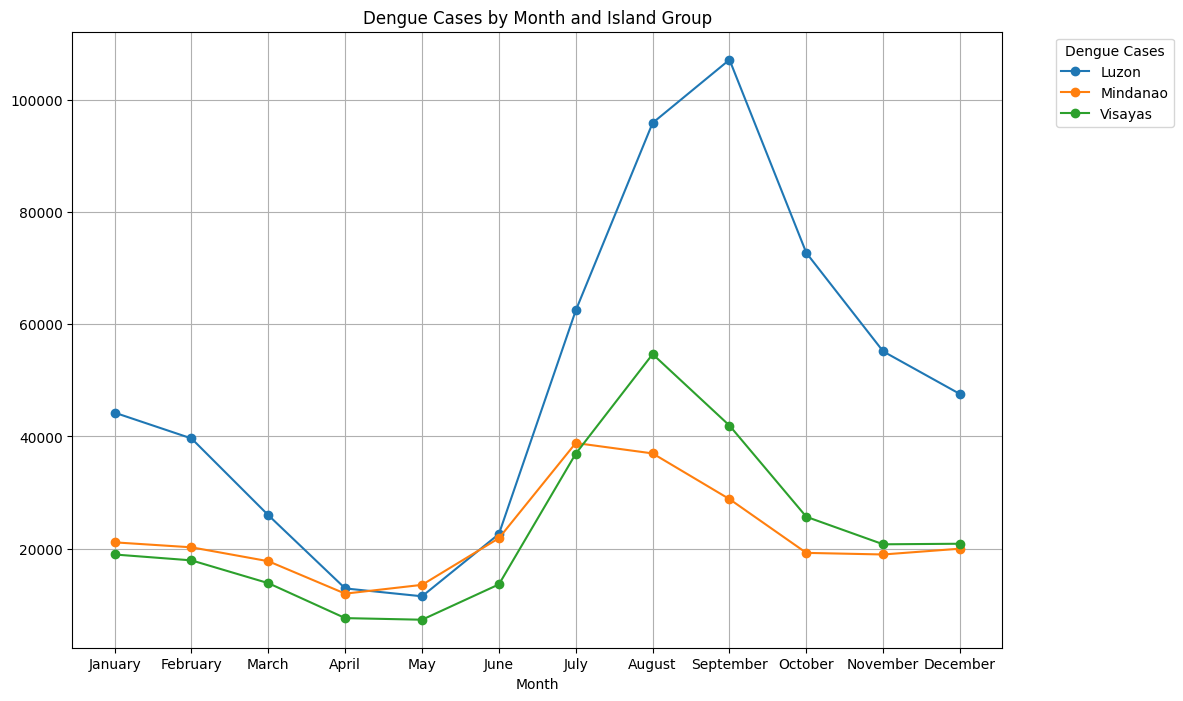

In [36]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
monthly_island = dengue.groupby(["Month", "Island"])["Dengue_Cases"].sum()

monthly_island.unstack().plot(kind='line', marker='o', title="Dengue Cases by Month and Island Group")
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.legend(title='Dengue Cases', bbox_to_anchor = (1.05,1), loc='upper left')
plt.xticks(range(0,12), month_order)
plt.show()

<h2><strong><i>Insight 11: </i></strong>In Luzon, the peak months of dengue cases are August and September. Luzon is ahead of Visayas and Mindanao because it has the highest number of regions under it. Visayas's peak month is August. While Mindanao's peak months are July and August.</h2>

<h2>Sa pagtaas ba ng cases sa isang month/peak month, nataas rin ang deaths?</h2>

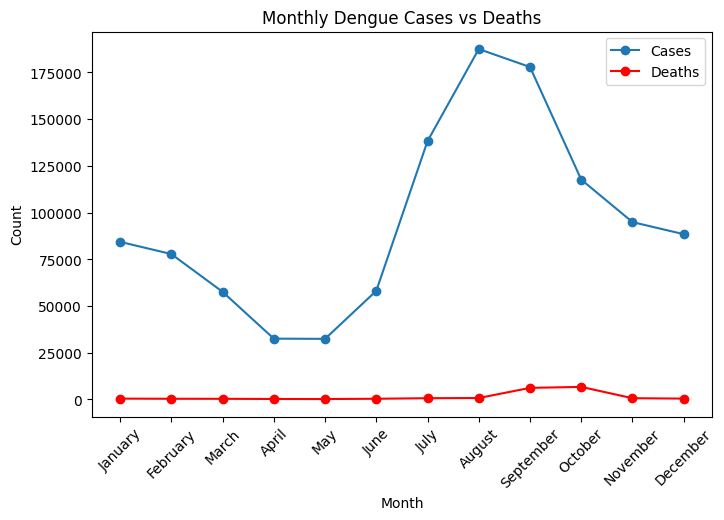

In [38]:
monthly = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
plt.figure(figsize=(8,5))
plt.plot(monthly["Month"], monthly["Dengue_Cases"], label="Cases", marker="o")
plt.plot(monthly["Month"], monthly["Dengue_Deaths"], label="Deaths", marker="o", color="red")
plt.title("Monthly Dengue Cases vs Deaths")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()

<h3><strong><i>Insight 12: </i></strong>We can strongly see that when <strong>dengue cases arises, it doesnt mean that dengue deaths arises too</strong>, even when the cases are peak. The trend of the death cases are mostly flat but there is a subtle increasing on september and october. This is actually good news because even though the cases of dengue are very much higher across the years mentioned, the death records are very low. I'm not sure if its because of the vaccine because there have been an issue about it. But overall, rising dengue cases is not equal to rising mortality.</h3>